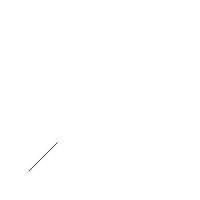

In [1]:
"""
Mathematical Illustrations In PostScript
A Manual of Geometry and PostScript
by Bill Casselman
http://www.math.ubc.ca/~cass/graphics/manual/

Previously I completed chapter one of Casselman's text using PostScript: 
https://www.mdashx.com/articles/math-illustrations-with-postscript/

It was fun, but eventually I used PostScript enough to conclude that it's 
not the tool I want to use. So I'm going to try following the exercises
in the book using Python and SVG instead.
"""

from collections import namedtuple

from IPython.display import SVG

##### 1.1. Simple drawing #####

# GS>newpath
# GS>144 144 moveto
# GS>288 288 lineto
# GS>stroke
# GS>

# PostScript coordinates in this example start at the lower left,
# but in SVG (0,0) is in the upper left corner.
#
# The content in chapter one describes scaling and transforming 
# coordinate systems in PostScript, and here I'm exploring the same
# topic in SVG.
#
# I'm using translate to move the origin and scale to flip the x-axis
# I'm setting the actual coordinate system using viewbox and then
# changing the actual size on the screen using height and width attributes.
# So in the 200x200 canvas I actually have a 1000x1000 grid.

def get_plane(canvas_height, canvas_width, height, width, children):
    return f"""
    <svg version="1.1"
         height="{canvas_height}"
         width="{canvas_width}"
         baseProfile="full"
         viewBox="0 0 {width} {height}"
         xmlns="http://www.w3.org/2000/svg">
        <g transform="translate(0, {height}) scale(1,-1)">
            {children}
        </g>
    </svg>
    """

children = """
  <line x1="144" x2="288" y1="144" y2="288" stroke="black" stroke-width="3"/>
"""

plane_height = 1000
plane_width = 1000
data = get_plane(200, 200, plane_height, plane_width, children)
SVG(data=data)





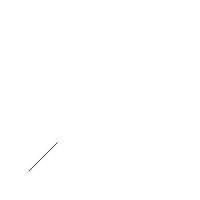

In [2]:
# Using lxml instead of string interpolation will probably save me lots
# of headaches in the long run.

from lxml import etree

def get_svg_element(canvas_height, canvas_width, height, width, x_translate=0, y_translate=0):
    svg = etree.Element(
        "svg",
        version="1.1",
        height=str(canvas_height),
        width=str(canvas_width),
        baseProfile="full",
        viewBox=f"{x_translate} {y_translate} {width} {height}",
        lxmns="http://www.w3.org/2000/svg",
    )
    return svg

height = 1000
width = 1000
plane = etree.Element("g", transform=f"translate(0, {height}) scale(1,-1)")
svg = get_svg_element(200, 200, height, width)
svg.append(plane)
line = etree.fromstring('<line x1="144" x2="288" y1="144" y2="288" stroke="black" stroke-width="3"/>')
plane.append(line)

SVG(etree.tostring(svg))

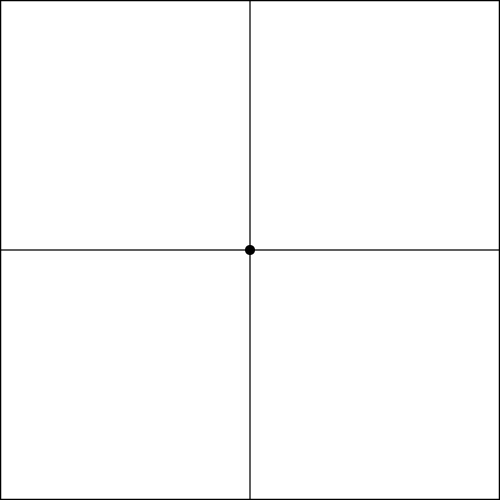

In [3]:
# I want to move (0,0) to the center of the viewport and 
# setup a good grid size for drawing the I.47 proof

svg = get_svg_element(500, 500, 10, 10, -5, -5)
plane = etree.Element("g", transform="scale(1,-1)")
svg.append(plane)
center = etree.fromstring('<circle cx="0" cy="0" r=".1" fill="black" />')
plane.append(center)
plane.append(etree.fromstring('<line x1="-5" y1="5" x2="5" y2="5" stroke="black" stroke-width=".05"/>'))
plane.append(etree.fromstring('<line x1="5" y1="5" x2="5" y2="-5" stroke="black" stroke-width=".05"/>'))
plane.append(etree.fromstring('<line x1="5" y1="-5" x2="-5" y2="-5" stroke="black" stroke-width=".05"/>'))
plane.append(etree.fromstring('<line x1="-5" y1="-5" x2="-5" y2="5" stroke="black" stroke-width=".05"/>'))
plane.append(etree.fromstring('<line x1="-5" y1="0" x2="5" y2="0" stroke="black" stroke-width=".025"/>'))
plane.append(etree.fromstring('<line x1="0" y1="5" x2="0" y2="-5" stroke="black" stroke-width=".025"/>'))
SVG(data=etree.tostring(svg))

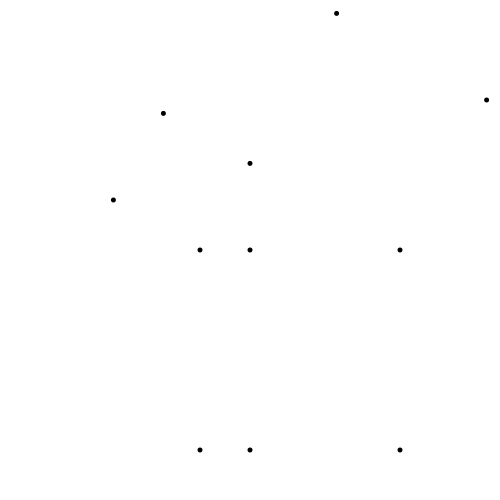

In [4]:
###### Exercise 1.10. #####
# Draw in PostScript the following pictures, taken, with modifications, from 
# the proof of Proposition I.47 in the standard edition of Euclid’s Elements. 
# Of course you might want to look up Euclid’s argument first. One thing to 
# keep in mind is that in drawing a complex figure, each conceptual component 
# in the program should be handled as a unit. A triangle is not just a bunch of 
# line segments, but line segments assembled in a particular order and style. 
# You should also think here about about using colors in an intelligent way to 
# help explain Euclid’s proof.

# https://mathcs.clarku.edu/~djoyce/elements/bookI/propI47.html

import math

Point = namedtuple('Point', 'x y')

def get_distance(p1, p2):
    return math.sqrt((p2.x - p1.x)**2 + (p2.y - p1.y)**2)

def get_vector(p1, p2):
    # https://math.stackexchange.com/questions/175896/finding-a-point-along-a-line-a-certain-distance-away-from-another-point
    # https://math.stackexchange.com/questions/426807/how-does-this-vector-addition-work-in-geometry 
    vector = [p2.x- p1.x, p2.y - p1.y]
    length = math.sqrt(vector[0]**2 + vector[1]**2)
    unit_vector = (vector[0] / length, vector[1] / length)
    return unit_vector
    
def get_point_from_vector(unit_vector, point, distance):   
    # Multiply the unit vector by the distance of the new point and 
    # add that to the terminal point (p2)
    return Point((point.x + (unit_vector[0] * distance)), (point.y + (unit_vector[1] * distance)))

class ShowPoint:
    def __init__(self, center):
        self.center = center
        
    def element(self):
        return etree.Element(
            "circle",
            cx=str(self.center.x),
            cy=str(self.center.y),
            r =".05"
        )
        
size = 10
translate = -(size/2)
svg = get_svg_element(500, 500, size, size, translate, translate)
plane = etree.Element("g", transform="scale(1,-1)")
svg.append(plane)    
        
# Triangle: (-1, 0) - left, (3, 0) - right, (0, sqrt 3) - top        

origin = Point(0,0)
a = Point(0, math.sqrt(3))
b = Point(-1, 0)
c = Point(3, 0)

length_ab = get_distance(a, b)
length_bc = get_distance(b, c)
length_ac = get_distance(a, c)

vector_ba = get_vector(b, a)
vector_ca = get_vector(c, a)

d = Point(b.x, b.y - length_bc)
e = Point(c.x, c.y - length_bc)
f = get_point_from_vector(vector_ca, b, length_ab)
g = get_point_from_vector(vector_ca, a, length_ab)
h = get_point_from_vector(vector_ba, a, length_ac)
k = get_point_from_vector(vector_ba, c, length_ac)
l = Point(0, 0 - length_bc)

for point in [a,b,c,d,e,f,g,h,k,l,origin]:
    plane.append(ShowPoint(point).element()) 

SVG(data=etree.tostring(svg))


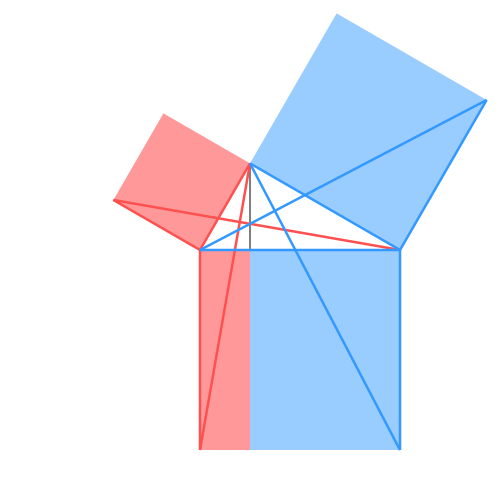

In [5]:
class SVGShape:
    def __init__(self, points, stroke_width=0.025, stroke_color="black", fill="none"):
        self.points = points
        self.stroke_width = stroke_width
        self.stroke_color = stroke_color
        self.fill = fill
        
        
class Line(SVGShape):
    def element(self):
        self.points = [Point(str(p.x), str(p.y)) for p in self.points]
        this_element = etree.Element(
            "line",
            x1=self.points[0].x,
            y1=self.points[0].y,
            x2=self.points[1].x,
            y2=self.points[1].y,
            stroke=self.stroke_color
        )
        this_element.set("stroke-width", str(self.stroke_width))
        return this_element


class Polygon(SVGShape):
    def element(self):
        points_list = " ".join([f"{p.x},{p.y}" for p in self.points])
        this_element = etree.Element(
            "polygon", 
            points=points_list, 
            stroke=self.stroke_color, 
            fill=self.fill
        )
        this_element.set("stroke-width", str(self.stroke_width))
        return this_element

elements = []

fill_1 = "#ff9999"
fill_2 = "#9cf"
stroke_1 = "#ff5050"
stroke_2 = "#3399ff"
width_1 = "0.05"

elements.append(Polygon([a, b, f, g], stroke_width="0", fill=fill_1))
elements.append(Polygon([origin, b, d, l], stroke_width="0", fill=fill_1))
elements.append(Polygon([a, c, k, h], stroke_width="0", fill=fill_2))
elements.append(Polygon([origin, c, e, l], stroke_width="0", fill=fill_2))

elements.append(Line([origin, a], stroke_width="0.02", stroke_color="black"))

elements.append(Line([d, b], stroke_width=width_1, stroke_color=stroke_1))
elements.append(Line([b, f], stroke_width=width_1, stroke_color=stroke_1))
elements.append(Line([b, a], stroke_width=width_1, stroke_color=stroke_1))
elements.append(Line([d, a], stroke_width=width_1, stroke_color=stroke_1))
elements.append(Line([c, f], stroke_width=width_1, stroke_color=stroke_1))

elements.append(Line([e, c], stroke_width=width_1, stroke_color=stroke_2))
elements.append(Line([c, k], stroke_width=width_1, stroke_color=stroke_2))
elements.append(Line([c, a], stroke_width=width_1, stroke_color=stroke_2))
elements.append(Line([b, c], stroke_width=width_1, stroke_color=stroke_2))
elements.append(Line([a, e], stroke_width=width_1, stroke_color=stroke_2))
elements.append(Line([b, k], stroke_width=width_1, stroke_color=stroke_2))

size = 10
translate = -(size/2)
svg = get_svg_element(500, 500, size, size, translate, translate)
plane = etree.Element("g", transform="scale(1,-1)")
svg.append(plane)

for element in elements:
    plane.append(element.element())

SVG(data=etree.tostring(svg))